In [1]:
from coreLib.dataset import DataSet
data_dir       = "/home/apsisdev/ansary/sourcedata/"
ds=DataSet(data_dir)
ds.common.symbols.df

 39%|███▉      | 79110/200840 [00:00<00:00, 791089.44it/s]

#LOG     :All paths found


  2%|▏         | 17806/1059977 [00:00<00:11, 91549.29it/s]

#LOG     :Processing Dictionary:/home/apsisdev/ansary/sourcedata/bangla/dictionary.csv


100%|██████████| 10305/10305 [00:00<00:00, 1235169.97it/s]


#LOG     :converting int labels to string


  4%|▍         | 15589/370098 [00:00<00:04, 78045.48it/s]

#LOG     :Processing Dictionary:/home/apsisdev/ansary/sourcedata/english/dictionary.csv


100%|██████████| 5975/5975 [00:00<00:00, 794552.06it/s]


#LOG     :bangla.graphemes


100%|██████████| 5975/5975 [00:00<00:00, 7057439.14it/s]


#LOG     :bangla.numbers
#LOG     :english.graphemes
#LOG     :english.numbers
#LOG     :common.symbols
#LOG     :bangla.fonts


100%|██████████| 3240/3240 [00:00<00:00, 6825487.17it/s]


#LOG     :english.fonts
#LOG     :common.background
#LOG     :common.noise.random
#LOG     :common.noise.sign


,filename,label,img_path
0,symbol_0,>,/home/apsisdev/ansary/sourcedata/common/symbol...
1,symbol_1,>,/home/apsisdev/ansary/sourcedata/common/symbol...
2,symbol_2,>,/home/apsisdev/ansary/sourcedata/common/symbol...
3,symbol_3,>,/home/apsisdev/ansary/sourcedata/common/symbol...
4,symbol_4,>,/home/apsisdev/ansary/sourcedata/common/symbol...
...,...,...,...
5970,symbol_5970,<,/home/apsisdev/ansary/sourcedata/common/symbol...
5971,symbol_5971,<,/home/apsisdev/ansary/sourcedata/common/symbol...
5972,symbol_5972,<,/home/apsisdev/ansary/sourcedata/common/symbol...
5973,symbol_5973,<,/home/apsisdev/ansary/sourcedata/common/symbol...


272


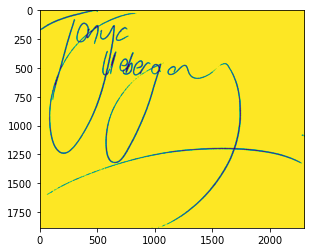

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 
import random

k = random.randint(0, 3238)
print(k)

img_path=os.path.join(ds.common.noise.sign,"mixed_" + str(k) +".bmp")
img=cv2.imread(img_path,0)
plt.imshow(img)
plt.show()

In [4]:
img_path

'/home/apsisdev/ansary/sourcedata/common/noise/signature/mixed_272.bmp'

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 
import os 
import cv2
import numpy as np
import random

from __notes__.memo_utils import memoHeadFunc, memoBottomFunc

class_map_csv='/home/apsisdev/ansary/synthdata/PoC/__notes__/class_map.csv'
font_path='/home/apsisdev/ansary/synthdata/PoC/__notes__/Bangla.ttf'

In [22]:
bottom_names_snd_rcv = [
                "প্রেরকের সাক্ষর", 
                "প্রাপকের সাক্ষর"
                
                ]

bottom_names_mdl = ["ব্রি. দ্র. এই খানে কিছু লেখা।"]

# bottom_names_mdl = None


img_f, sr_iden_list = memoBottomFunc(
                                      bottom_names_snd_rcv,
                                      bottom_names_mdl,
                                      class_map_csv,
                                      font_path)

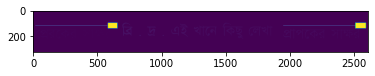

(320, 2608)


In [23]:
# h,w = img_f.shape
# print(w, h)

# img_f_pad = padImg(img_f, h*2, w)
# plt.imshow(img_f_pad)
# plt.show()


plt.imshow(img_f)
plt.show()

print(img_f.shape)

In [24]:
np.unique(img_f)

array([  0.,   4.,   5.,   6.,   8.,   9.,  10.,  11.,  13.,  14.,  15.,
        17.,  18.,  19.,  20.,  22.,  23.,  25.,  26.,  28.,  29.,  31.,
        32.,  34.,  36.,  38.,  40., 255., 855., 856.])

In [25]:
def placeImageOnBackground(img,back,bbox):
    '''
        @author
        places a specific image on a given background at a specific location
        args:
            img   :   greyscale image to place
            back  :   background to place the image
            bbox  :   coordinate of bbox i.e., (y_min,y_max,x_min,x_max)
        location constraint:
            the bounding box centering the (x,y) point can be random
        return:
            back  :   back image after placing 'img'
    '''
    (y_min, y_max, x_min, x_max) = bbox
    ## back: ignore lines of table
    back[y_min:y_max,x_min:x_max]=0
    ## img: resize image
    h_max = abs(y_max-y_min)
    w_max = abs(x_max-x_min)
    dim = (h_max, w_max)
    _img = cv2.resize(img, dim[::-1], fx=0,fy=0, interpolation = cv2.INTER_NEAREST)
    ## place "img" on "back"
    back[y_min:y_max,x_min:x_max]=_img
    return back

In [26]:
def loadSignatureImg(number_image):
    imgss = []
    for i in range(number_image):
        k = random.randint(0, 3238)
        img_path=os.path.join(ds.common.noise.sign,"mixed_" + str(k) +".bmp")
        if os.path.exists(img_path):
#             print("file is there")
            img=cv2.imread(img_path,0)
            imgss.append(img)
#         else:
#             print(str(img_path) + ": not found")
    return imgss

sign_imgs = loadSignatureImg(20)
# print(len(sign_imgs))

num_to_select = len(sr_iden_list)                        # set the number to select here.
list_of_random_imgs = random.sample(sign_imgs, num_to_select)
# print(len(list_of_random_imgs))

In [27]:

for i,img in zip(sr_iden_list,list_of_random_imgs):
    idx = np.where(img_f==i)
    h,w=img.shape
    print(h,w)
    
    y_min, y_max, x_min, x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])
    print(y_min, y_max, x_min, x_max)
    
    ## resize image
    h_max = abs(y_max-y_min)
    w_max = abs(x_max-x_min)
    
    print(h_max, w_max)

    if w<x_min: 
        y_min, y_max, x_min, x_max=y_min, y_max, abs(x_min-w), x_max
    else:
        y_min, y_max, x_min, x_max=y_min, y_max, (x_min-w//2), x_max

    bbox = (y_min, y_max, x_min, x_max)

    img_f=placeImageOnBackground(img,img_f,bbox)

32 101
97 138 583 656
41 73
593 1202
97 138 2509 2591
41 82


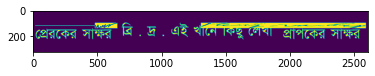

In [28]:
img_f[img_f>0]=255
plt.imshow(img_f)
plt.show()

In [29]:
# img_f_pad[img_f_pad>0]=255
# plt.imshow(img_f_pad)
# plt.show()

In [30]:
# img_f_pad.shape

In [31]:
sr_iden_list

[855, 856]

In [32]:
# cv2.drawline

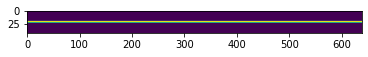

In [33]:
import cv2  # python-opencv
import numpy as np

width, height = 639, 84//2 
x1, y1 = 0, 84//4 
x2, y2 = 639, 84//4 
image = np.zeros((height, width)) * 255

line_thickness = 2
cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), thickness=line_thickness)

plt.imshow(image)
plt.show()

In [34]:
np.unique(image)

array([  0., 255.])

In [35]:
def over(char):
    l = len(char)
    return l*("_")+"\n"+char

over("সাক্ষর")

'______\nসাক্ষর'

In [36]:
# arr = ["সাক্ষর",None, "সাক্ষর"]

arr = ["সাক্ষর","সাক্ষর", "সাক্ষর"]

k = []
for i in range(len(arr)):
    if i==1 and arr[i] == None:
        k.append(25*(" "))
    elif i==1 and arr[i] != None:
        k.append(arr[i])
    else:
        k.append(over(arr[i]))
    
print(k)

['______\nসাক্ষর', 'সাক্ষর', '______\nসাক্ষর']


In [37]:
k = [1,3,4,5]

for val in k[3:]:
    print(val)

5
